In [1]:
from src.config import Config
import matplotlib.pyplot as plt
import os
from src import helper

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
dataset = "original"
training_type = "top"
output_network_type = "current"

In [4]:
original_test_datapath = os.path.join(Config.processed_data_path, str(dataset) + "_valid")

'/home/casey/Desktop/f2b/data/processed/original_valid'

In [5]:
result, export_path = helper.predict_bmi(training_type=training_type, dataset=dataset, output_network_type=output_network_type, data_path=original_test_datapath)

Found 226 validated image filenames.
15/15 [==============================] - 4s 71ms/step


In [6]:
result['predicted'].describe()

count    226.000000
mean      21.640247
std        2.334471
min       16.332014
25%       19.990916
50%       21.550598
75%       23.172308
max       28.038750
Name: predicted, dtype: float64

In [7]:
result['error'].describe()

count    226.000000
mean       2.803766
std        3.132505
min        0.003714
25%        1.008529
50%        1.920665
75%        3.342200
max       24.338426
Name: error, dtype: float64

In [8]:
samples = result.sample(n=Config.batch_size)

In [12]:
print(samples.drop(['path'], axis=1).to_markdown())

|     | image   |     bmi |   predicted |    error |
|----:|:--------|--------:|------------:|---------:|
|  64 | f_296   | 19.0381 |     18.9343 | 0.10385  |
|   3 | f_007   | 18.6851 |     18.398  | 0.287147 |
| 124 | m_033   | 24.2513 |     21.6561 | 2.59515  |
|  42 | f_182   | 21.1927 |     21.8477 | 0.654977 |
|  39 | f_161   | 22.151  |     20.476  | 1.67498  |
| 158 | m_193   | 23.6295 |     24.8321 | 1.20259  |
|  94 | f_447   | 19.4734 |     20.7492 | 1.27584  |
|  82 | f_400   | 18.3768 |     18.7342 | 0.357378 |
| 188 | m_348   | 23.5294 |     21.5889 | 1.94047  |
| 215 | m_461   | 20.0474 |     21.0638 | 1.01632  |
| 155 | m_182   | 25.1429 |     20.3578 | 4.78506  |
|  77 | f_355   | 20.3125 |     16.8742 | 3.4383   |
|  74 | f_347   | 21.3839 |     18.872  | 2.51191  |
|  34 | f_126   | 18.3768 |     19.8064 | 1.42958  |
|  35 | f_137   | 21.3578 |     20.6535 | 0.704298 |
| 148 | m_137   | 20.4529 |     26.0684 | 5.61552  |


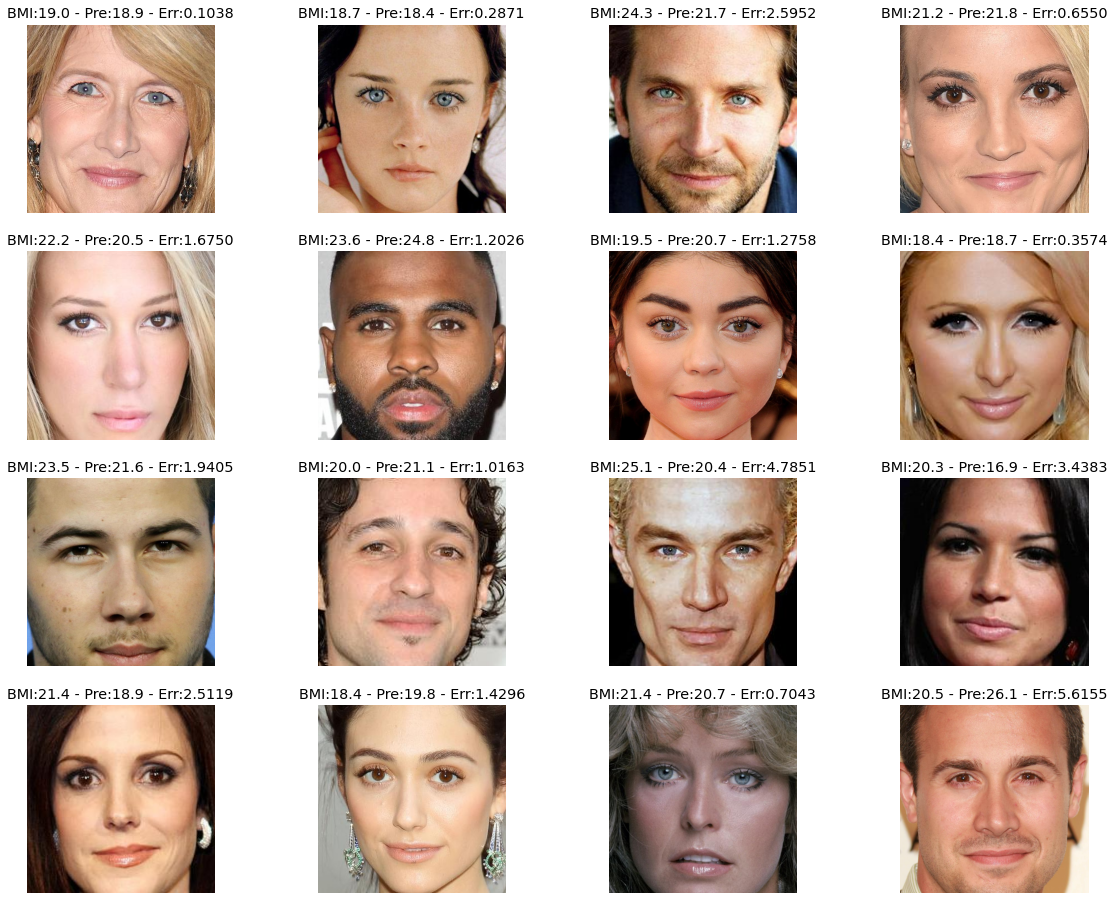

In [10]:
helper.plot_batch_images(batch_size=Config.batch_size, dataframe=samples, starting_idx=0, columns=['bmi', 'predicted', 'error'], export_path=export_path)